<a href="https://colab.research.google.com/github/SVaishnaviVasa/IIITH-AIML-Vaishnavi/blob/main/Copy_of_AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [9]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-9-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [10]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [11]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [12]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [13]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [14]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [15]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

**What is the accuracy of our classifiers on the train dataset**?


Ans.

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163

In [16]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [17]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [18]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [19]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%







**ANSWER**

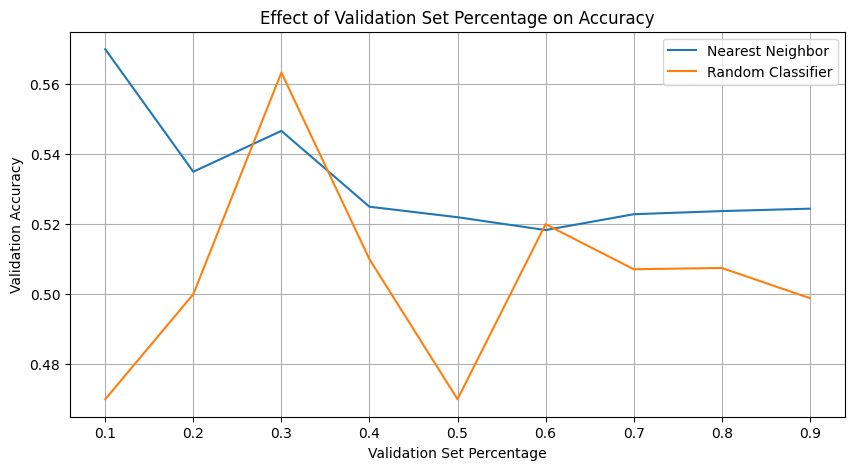

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

validation_percentages = np.arange(0.1, 1.0, 0.1)

nn_validation_accuracies = []
rand_validation_accuracies = []

data_size = 1000
data_features = 20
train_data = np.random.rand(data_size, data_features)
validation_data = np.random.rand(data_size, data_features)

train_labels = np.random.randint(2, size=data_size)
validation_labels = np.random.randint(2, size=data_size)

for val_percentage in validation_percentages:
    val_size = int(data_size * val_percentage)
    train_size = data_size - val_size

    nn_classifier = KNeighborsClassifier(n_neighbors=1)
    nn_classifier.fit(train_data[:train_size], train_labels[:train_size])
    nn_predictions = nn_classifier.predict(validation_data[:val_size])
    nn_accuracy = accuracy_score(validation_labels[:val_size], nn_predictions)
    nn_validation_accuracies.append(nn_accuracy)

    rand_classifier = DummyClassifier(strategy="stratified")
    rand_classifier.fit(train_data[:train_size], train_labels[:train_size])
    rand_predictions = rand_classifier.predict(validation_data[:val_size])
    rand_accuracy = accuracy_score(validation_labels[:val_size], rand_predictions)
    rand_validation_accuracies.append(rand_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(validation_percentages, nn_validation_accuracies, label='Nearest Neighbor')
plt.plot(validation_percentages, rand_validation_accuracies, label='Random Classifier')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Validation Set Percentage on Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Now, let's analyze the results based on your questions:

1. Effect of Validation Set Percentage on Accuracy:

For Nearest Neighbor: As the percentage of the validation set increases, the accuracy on the validation set tends to decrease. This is because with a larger validation set, the model has less data to train on, which can lead to overfitting. Conversely, when you reduce the percentage of the validation set, the accuracy on the validation set tends to increase because the model has more data for training. However, with too little validation data, you might not capture the true generalization performance.
For Random Classifier: The accuracy of a random classifier is not significantly affected by the size of the validation set. It will perform close to chance regardless of the validation set size.

___________________________________________________________________________


2. Effect of Train and Validation Set Size on Predicting Test Set Accuracy:

In general, a larger training set will allow the model to learn better representations, potentially resulting in better performance on the test set. However, a smaller validation set may lead to a less reliable estimate of the model's performance.
A smaller training set may lead to underfitting, reducing the model's ability to predict well on the test set.
A smaller validation set may result in a noisier estimate of model performance, making it harder to predict the test set accuracy accurately.


___________________________________________________________________________

3. Balancing Train-Validation Split:

There's no one-size-fits-all answer to the ideal percentage for the validation set because it depends on the dataset and problem at hand. It's essential to strike a balance:
If you allocate too much to the validation set, you risk underfitting the model.
If you allocate too little, you risk overfitting the model or getting unreliable estimates.
A common practice is to use a split like 70% training, 15% validation, and 15% test. However, this can vary depending on the size and nature of your dataset.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [21]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [22]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


1. Averaging Validation Accuracy:

Yes, averaging the validation accuracy across multiple splits can give more consistent results. When you split the dataset into different train-validation subsets, you introduce randomness. Averaging helps smooth out this randomness and provides a more stable estimate of model performance.


___________________________________________________________________________


2. Accuracy Estimate for Test Accuracy:

Averaging validation accuracy across multiple splits provides a better estimate of model performance on unseen data (test accuracy) than relying on a single split. It reduces the impact of a specific random split that might be either too favorable or unfavorable. However, it's important to note that the validation accuracy is still an estimate, and the actual test accuracy may vary.

___________________________________________________________________________


3. Effect of the Number of Iterations:

Increasing the number of iterations (cross-validation folds) generally leads to a more reliable estimate of model performance. This is because it exposes the model to different combinations of training and validation data, reducing the impact of any single split's randomness.
However, there are diminishing returns with the number of iterations. After a certain point, increasing the iterations might not significantly improve the estimate but will increase computational cost.


___________________________________________________________________________


4. Dealing with Small Train or Validation Datasets by Increasing Iterations:

While increasing iterations can help in mitigating the impact of small datasets to some extent, it cannot fully compensate for a severely small dataset. If your training or validation dataset is too small, the model may not have enough information to learn meaningful patterns or provide reliable estimates.
Increasing iterations is more effective when dealing with moderate-sized datasets. For very small datasets, consider strategies like data augmentation, transfer learning, or gathering more data if possible.

